# Imports

In [1]:
import sys
import os
import json
from pathlib import Path

In [2]:
sys.path.append(os.path.join(os.getcwd(),"..",".."))

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from clean_text_data import CleanText

In [6]:
data_store=Path(os.getcwd()).parent.parent/"Data_Store"

# Load Data

In [7]:
data=pd.read_csv(os.path.join(data_store,"doc_classification_data.csv"))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [9]:
doc_labels={
    "Politics":0,
    "Sport":1,
    "Technology" :2,
    "Entertainment":3,
    "Business":4
}

In [10]:
with open(os.path.join(data_store,"doc_classifier_label.json"),"w") as file:
    json.dump(doc_labels,file)

# Data Analysis (Before Data Cleaning)

## Label Count

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

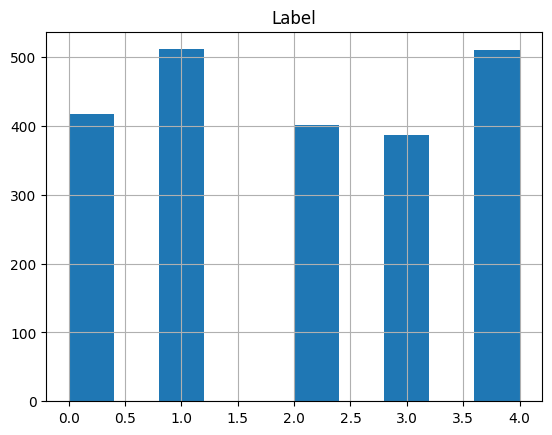

In [11]:
data[["Label"]].hist()

## Words Count Per Text

In [12]:
data["word_count"]=data["Text"].apply(lambda x: len(x.split(" ")))

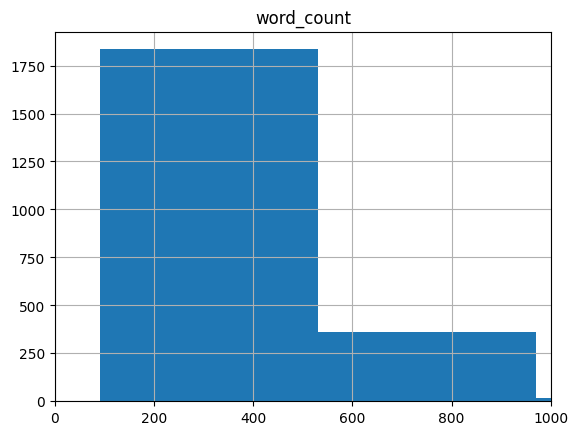

In [13]:
data[["word_count"]].hist()
plt.xlim(0,1000)
plt.show()

## Word Count Per Bin

In [14]:
def count_per_bin(word_len):
    if word_len>0 and word_len<=100:
        return "0-100"
        
    elif word_len>100 and word_len<=200:
        return "101-200"

    elif word_len>200 and word_len<=300:
        return "201-300"
        
    elif word_len>300 and word_len<=400:
        return "301-400"

    elif word_len>400 and word_len<=500:
        return "401-500"

    elif word_len>500 and word_len<=600:
        return "501-600"

    elif word_len>600 and word_len<=700:
        return "601-700"

    elif word_len>700 and word_len<=800:
        return "701-800"

    elif word_len>800 and word_len<=900:
        return "801-900"

    elif word_len>900 and word_len<=1000:
        return "901-1000"

    else:
        return"greater than 1000"

    

In [15]:
data["word_count_per_bin"]=data["word_count"].apply(lambda x:count_per_bin(x))

<Axes: xlabel='word_count_per_bin'>

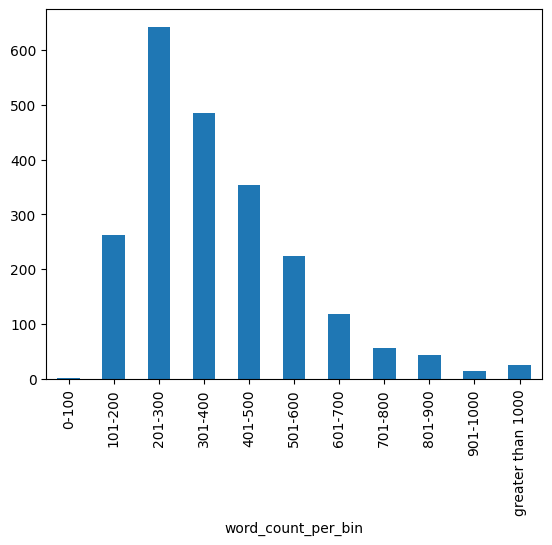

In [16]:
data["word_count_per_bin"].value_counts().sort_index().plot(kind="bar")

# Cleaning Data

In [17]:
data["cleaned_text"]=data["Text"].apply(lambda x: CleanText(x))

In [18]:
data

,Text,Label,word_count,word_count_per_bin,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,550,501-600,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,504,501-600,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,0,547,501-600,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,0,502,501-600,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,0,445,401-500,kilroy names election seat target show host ro...
...,...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,4,228,201-300,india opens skies competition india allow dome...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,402,401-500,yukos bankruptcy us russian authorities abide ...
2222,Survey confirms property slowdown\n \n Governm...,4,326,301-400,survey confirms property slowdown government f...
2223,High fuel prices hit BA's profits\n \n British...,4,411,401-500,high fuel prices hit profits british airways b...


In [19]:
data["cleaned_text_word_count"]=data["cleaned_text"].apply(lambda x: len(x.split(" ")))

In [20]:
data["cleaned_text_bin"]=data["cleaned_text_word_count"].apply(lambda x: count_per_bin(x))

<Axes: xlabel='cleaned_text_bin'>

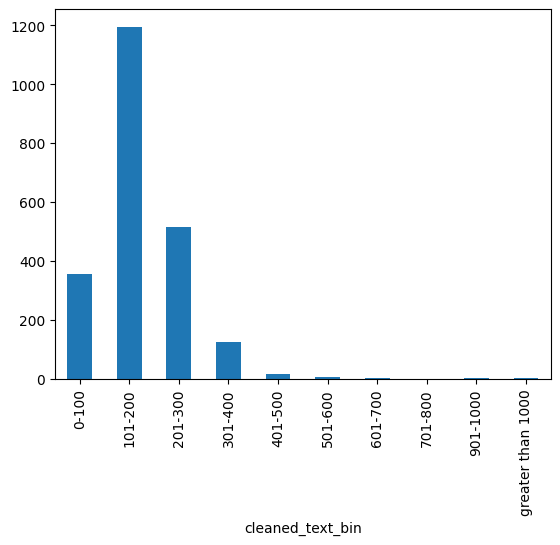

In [21]:
data["cleaned_text_bin"].value_counts().sort_index().plot(kind="bar")

In [22]:
print("Cleaned Text Word Count:")
print(f"Mean: {data['cleaned_text_word_count'].mean(axis=0)}")
print(f"Median: {data['cleaned_text_word_count'].median(axis=0)}")


Cleaned Text Word Count:
Mean: 175.32898876404494
Median: 154.0


In [23]:
data[["cleaned_text_word_count"]].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

,cleaned_text_word_count
count,2225.000000
mean,175.328989
std,101.100876
min,40.000000
10%,89.000000
25%,114.000000
50%,154.000000
75%,215.000000
90%,281.000000
95%,328.000000


# Model Decision

### We will fix the length of the input text to be 200.
### We will use a Multi-LSTM model with each model having the context window of 25 words.
### So we will need 8 LSTM-units.
### The Final model will be Multi-LSTM Layer followed by the Dense Neural Network

# Saving Prepared Data

In [24]:
data.to_csv(
    os.path.join(data_store,"doc_classifier_prepared_data.csv"),
    index=False
)

# END